<a href="https://www.kaggle.com/code/milicaradisavljevic/diabetes-indicators-classification?scriptVersionId=189355231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the libraries

In [1]:
import pandas as pd #managing the data
import numpy as np #mathematical operations
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt #vizualization
import seaborn as sns #visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the data

In [2]:
data = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# About the data

Diabetes disrupts glucose regulation, either by insufficient insulin production or ineffective use of insulin, leading to complications such as heart disease, vision loss, and kidney disease. While there's no cure, lifestyle changes like weight loss, healthy eating, and physical activity, along with medical treatments, can help manage the disease. Early diagnosis is crucial, allowing for proactive management and reducing long-term complications.

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual health-related telephone survey conducted by the CDC, gathering data on health behaviors, chronic conditions, and preventative service usage. 


Diabetes Health Indicators Dataset from Kaggle will be used. Dataset have 253,680 survey responses from cleaned BRFSS 2015 + balanced dataset.


Key Attributes:

- Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes;
- HighBP: High blood presure (0 = no high,BP 1 = high BP);
- HighChol: 0 = no high cholesterol 1 = high cholesterol;
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years;
- BMI: Body Mass Index;
- Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes;
- Stroke: (Ever told) you had a stroke. (0,1);
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes;
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes;
- Fruits : Consume Fruit 1 or more times per day (0,1);
- Veggies : Consume Vegetables 1 or more times per day (0,1);
- HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes;
- AnyHealthcare:Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes;
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes;
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor;
- Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days;
- PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days;
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes;
- Sex: 0 = female 1 = male;
- Age: age;
- Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate);
- Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more;

Fature descriptions taken from:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

# Objectives

Our goal is to train a model that will be able to predict whether a person has diabetes, prediabetes or is healthy.
We will train several ML models (Decision Trees, Random Forest and Multi-class logistic regression), and compare their results.

# Data exploration and preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

The dataset contains 253680 entries and 22 columns. All columns in dataset have float64 dtype. Dataset doent have null values. The Diabetes_012 column will be used as a target.


In [5]:
#checking for duplicates 
data.duplicated().sum()

23899

In [6]:
#we have 23899 duplicate, so we will remove it
data.drop_duplicates(inplace=True)
data.shape

(229781, 22)

In [7]:
data.Diabetes_012.value_counts(normalize=True)

Diabetes_012
0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: proportion, dtype: float64

<Axes: xlabel='Diabetes_012'>

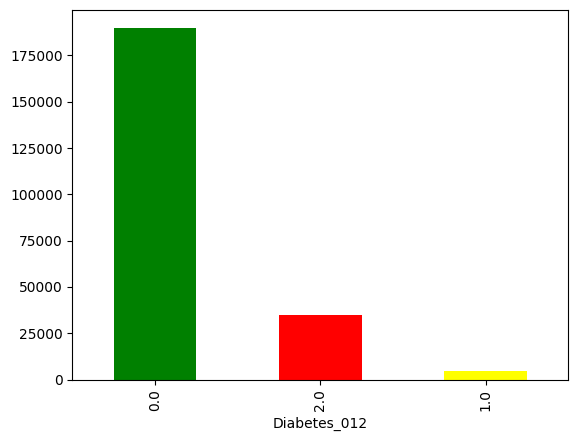

In [8]:
data.Diabetes_012.value_counts().plot.bar(color=['green', 'red', 'yellow'])

We investigated the column Diabetes_012, which will be our target. We noticed that the largest number of people in dataset, even 82%, do not have diabetes, 15% have prediabetes, and only 2% have diabetes.


## Feature Engineering


### Correlations checking

In order to get the most accurate model and to not overload it with not important informations, we want to keep only the most relevant features. We will filter the features and keep those that have a correlation greater or equal than 0.2 with the target. Target in our case is column "Diabetes_012". For the same reason, for the most relevant features, we will check the presence of outliers and remove them.

In [9]:
#list of top features that have high correlation between features and target
features = data.corr()['Diabetes_012'].sort_values()
features

Income                 -0.147102
Education              -0.107742
PhysActivity           -0.103408
HvyAlcoholConsump      -0.067164
Veggies                -0.043446
Fruits                 -0.025462
NoDocbcCost             0.023568
AnyHealthcare           0.024911
Sex                     0.032243
Smoker                  0.046774
MentHlth                0.057698
CholCheck               0.075701
Stroke                  0.100276
PhysHlth                0.160485
HeartDiseaseorAttack    0.170816
Age                     0.184642
HighChol                0.203327
DiffWalk                0.210638
BMI                     0.212027
HighBP                  0.261976
GenHlth                 0.284881
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

In [10]:
high_corr_features = features[features >= 0.024].index
high_corr_features


Index(['AnyHealthcare', 'Sex', 'Smoker', 'MentHlth', 'CholCheck', 'Stroke',
       'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'DiffWalk',
       'BMI', 'HighBP', 'GenHlth', 'Diabetes_012'],
      dtype='object')

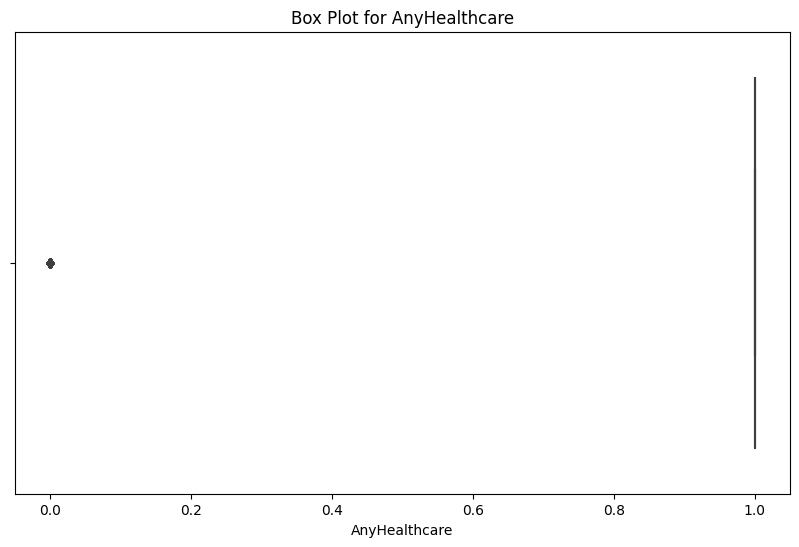

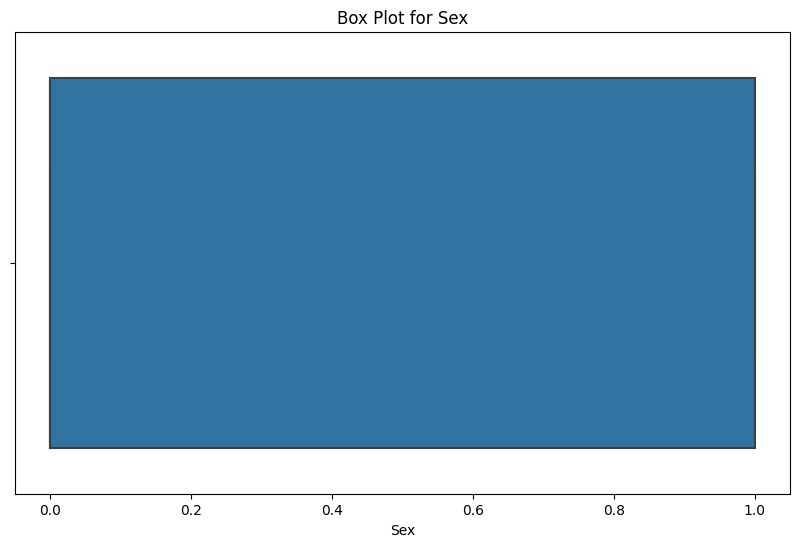

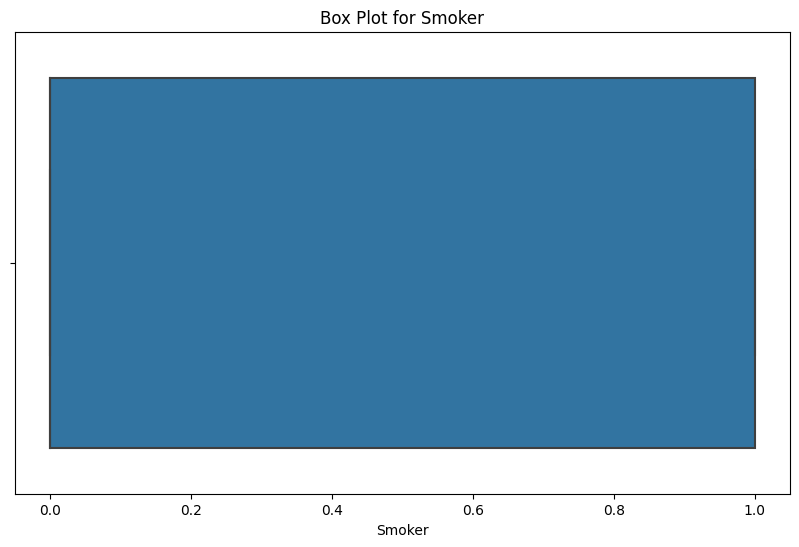

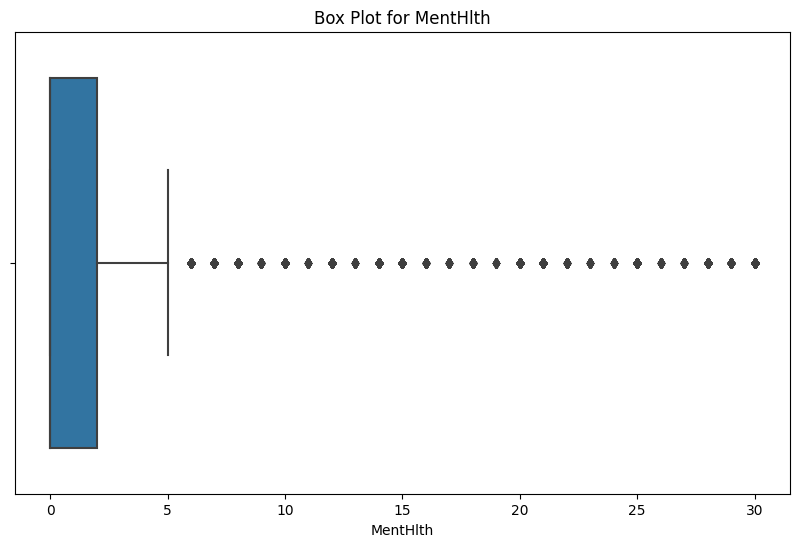

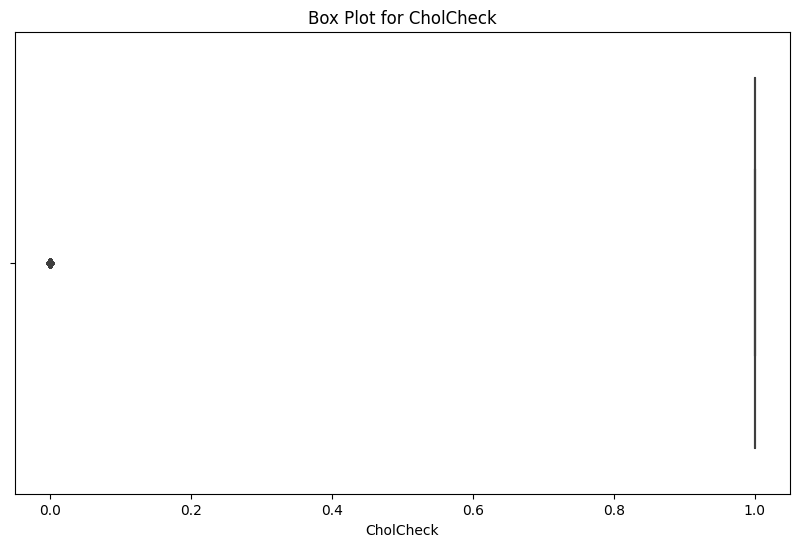

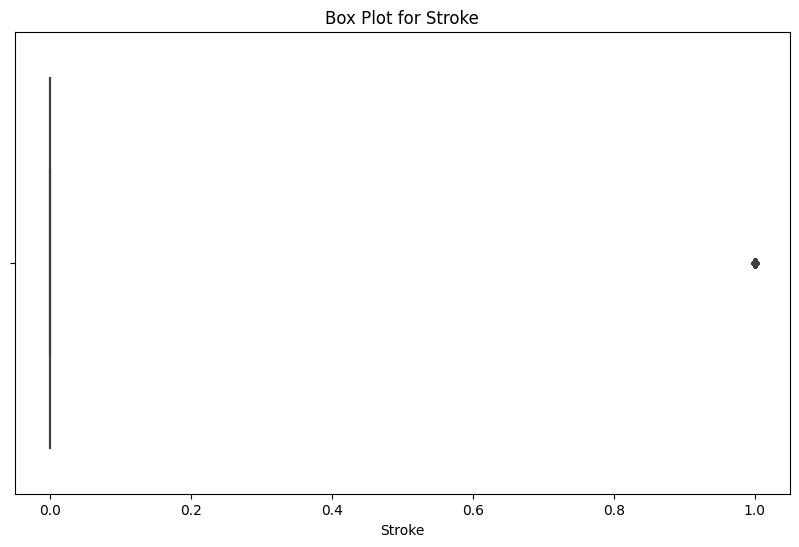

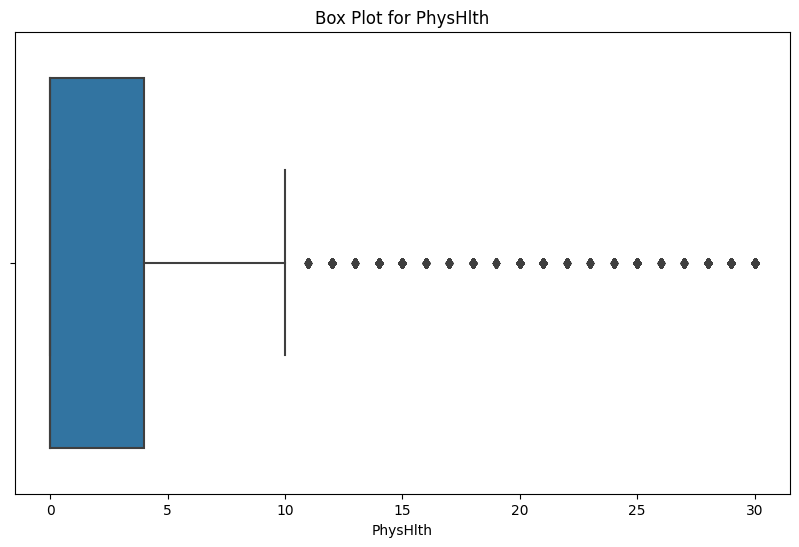

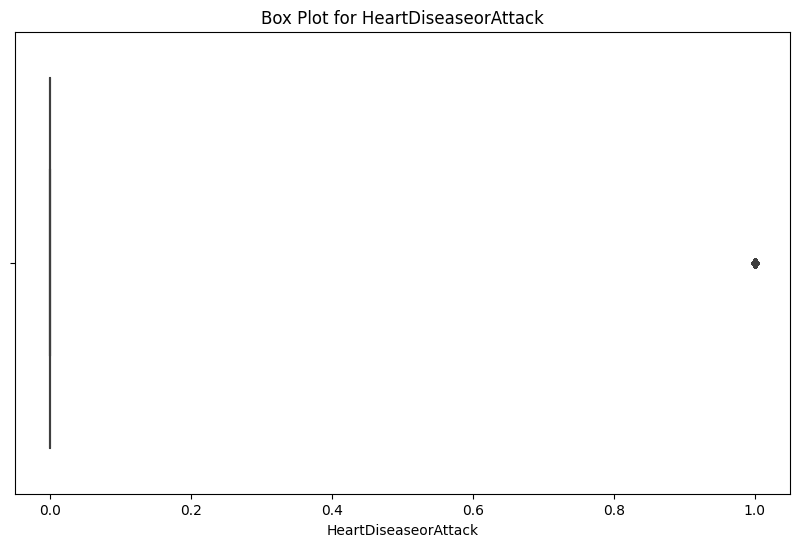

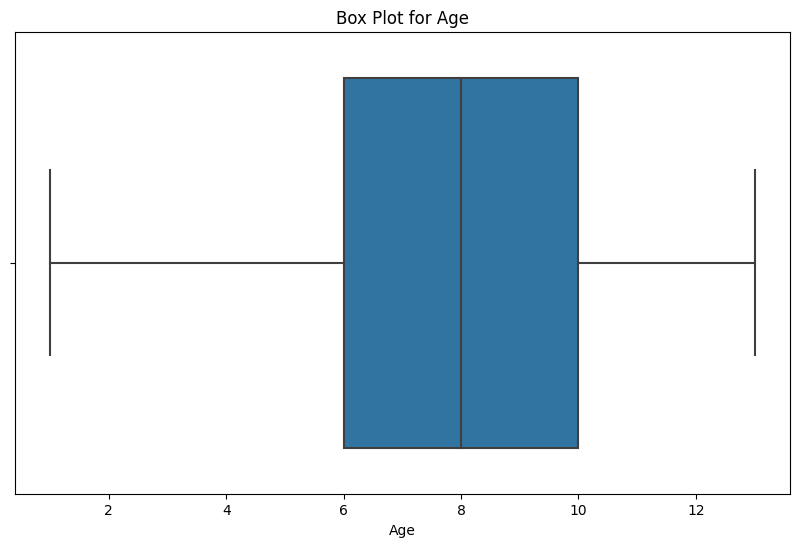

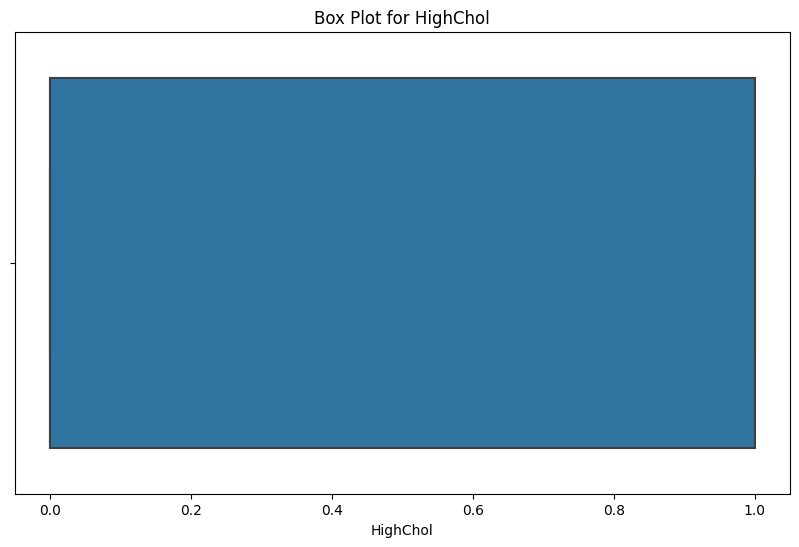

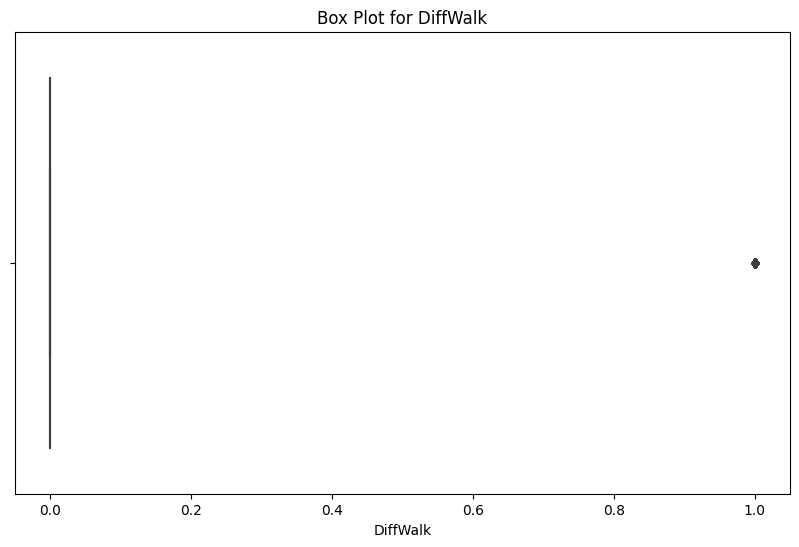

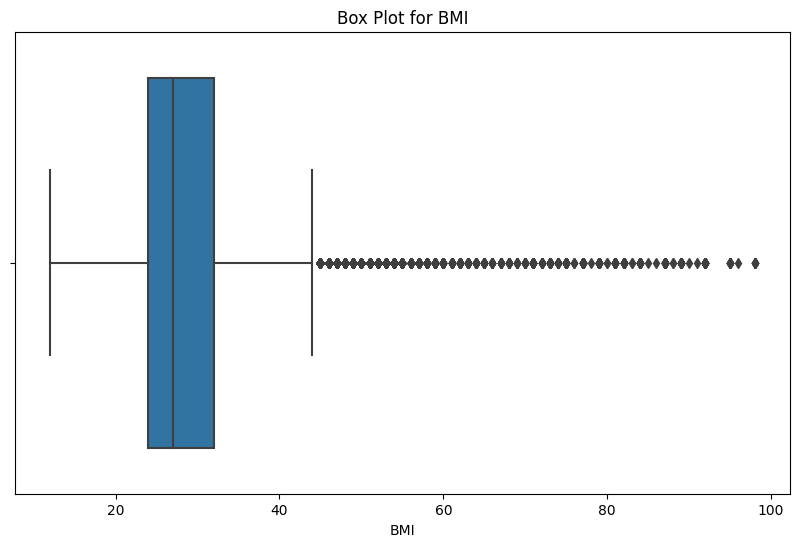

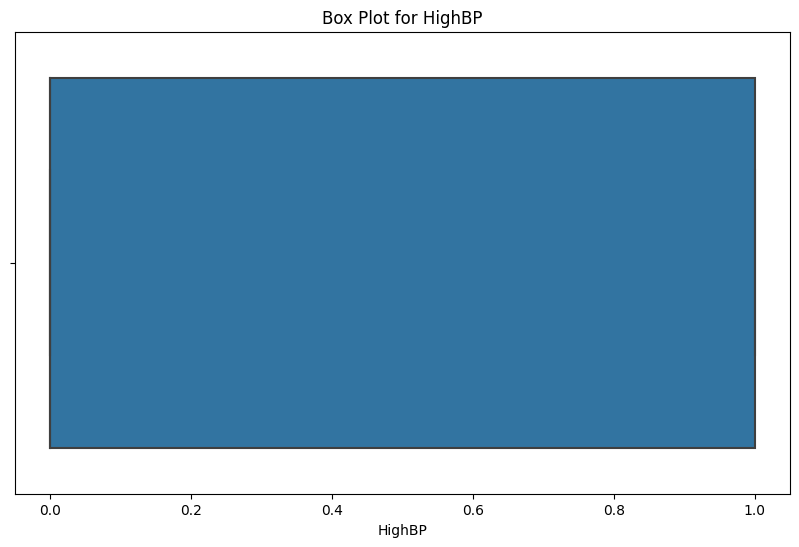

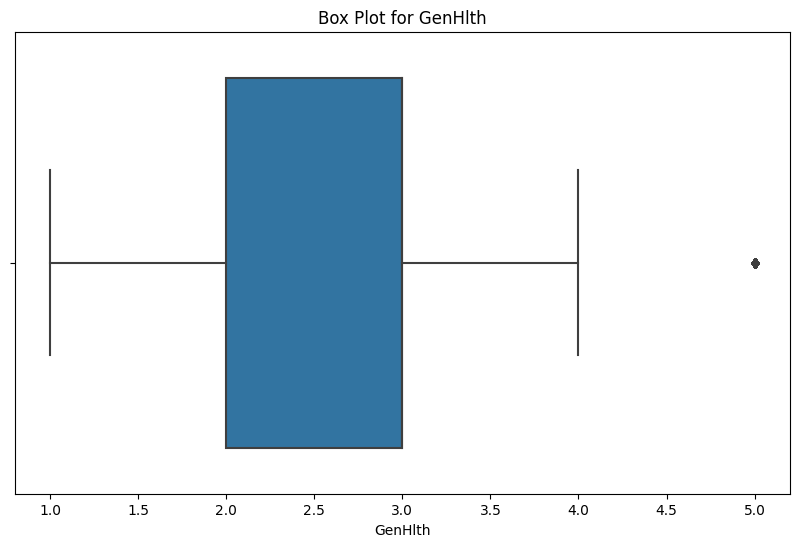

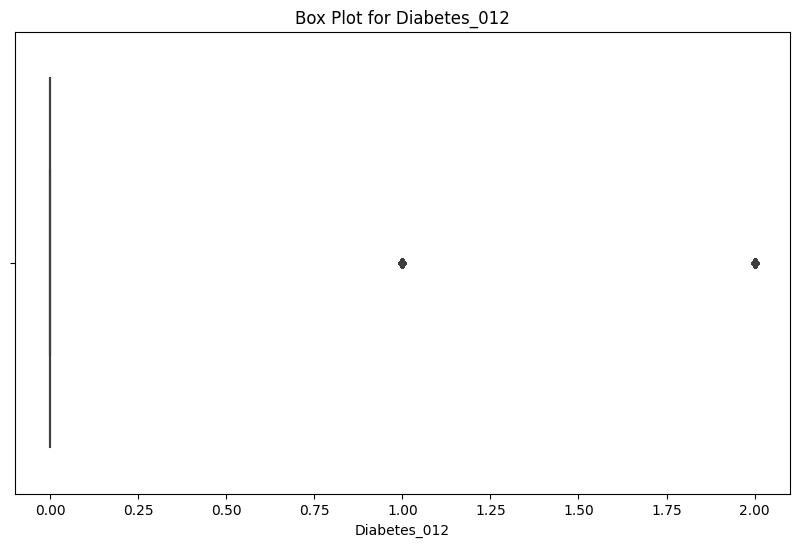

In [11]:
# Visualizing high_corr_features to see if we have outliers

for column in high_corr_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

### Dealing with outliers - IQR

In [12]:
# Function to fix outliers based on IQR
def fix_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data[column] = data[column].clip(lower_bound, upper_bound)
    return data

# Fix outliers in 'MentHlth' column
data = fix_outliers_iqr(data, 'MentHlth')

# Fix outliers in 'PhysHlth' column
data = fix_outliers_iqr(data, 'PhysHlth')

# Fix outliers in 'BMI' column
data = fix_outliers_iqr(data, 'BMI')

# Fix outliers in 'GenHlth' column
data = fix_outliers_iqr(data, 'GenHlth')


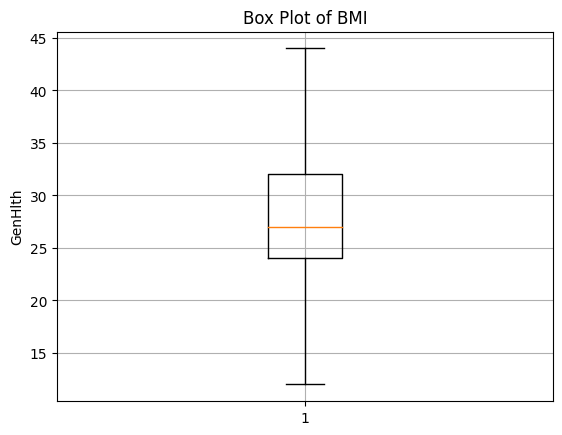

In [13]:
plt.boxplot(data['BMI'])
plt.title('Box Plot of BMI')
plt.ylabel('GenHlth')
plt.grid(True)
plt.show()

We removed outliers from those features('BMI', 'GenHlth') where I concluded that there is the greatest deviation based on the box plot.

### Defining raw input and output

In [14]:
#defining raw input and output
X_raw = data[['AnyHealthcare', 'Sex', 'Smoker', 'MentHlth', 'CholCheck', 'Stroke',
       'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'DiffWalk',
       'BMI', 'HighBP', 'GenHlth']]
y = data['Diabetes_012']

In [15]:
y.value_counts(normalize=True)

Diabetes_012
0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: proportion, dtype: float64

### Scaling Features

In [16]:
print(type(X_raw))

<class 'pandas.core.frame.DataFrame'>


In [17]:
scaler = StandardScaler()

# Scaling the raw input features
X = scaler.fit_transform(X_raw)

# Models

## Split the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

## Decision Trees Classifier

In [19]:
#defining the model
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, random_state=123)

#training the model
model_dt.fit(X_train, y_train.values.ravel())

#predicting on test data
preds = model_dt.predict(X_test)

In [20]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

evaluate_metrics(y_test, preds)

{'accuracy': 0.8328655047109255,
 'recall': 0.8328655047109255,
 'precision': 0.8328655047109255,
 'f1score': 0.8328655047109255}

In [21]:
model_dt = DecisionTreeClassifier(random_state=123)

In [22]:
params_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [23]:
grid_search_dt = GridSearchCV(estimator = model_dt, 
                        param_grid = params_grid_dt, 
                        scoring='accuracy',
                        cv = 5, verbose = 1)
grid_search_dt.fit(X_train, y_train.values.ravel())
best_params_dt = grid_search_dt.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [24]:
best_params_dt

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [25]:
# Defining the model
model_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,  
    random_state=123
)

#training the model
model_dt.fit(X_train, y_train.values.ravel())

#predicting on test data
preds_dt = model_dt.predict(X_test)

In [26]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

evaluate_metrics(y_test, preds_dt)

{'accuracy': 0.8312117849293905,
 'recall': 0.8312117849293905,
 'precision': 0.8312117849293905,
 'f1score': 0.8312117849293904}

## Random Forest

In [27]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

In [28]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

evaluate_metrics(y_test, y_rf_pred)

{'accuracy': 0.809626389886198,
 'recall': 0.809626389886198,
 'precision': 0.809626389886198,
 'f1score': 0.809626389886198}

## Multi-class logistic regression

In [29]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

#Fit the model to the training data
lr_model.fit(X_train, y_train)

#Make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

In [30]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

evaluate_metrics(y_test, y_lr_pred)

{'accuracy': 0.8330395804774028,
 'recall': 0.8330395804774028,
 'precision': 0.8330395804774028,
 'f1score': 0.8330395804774028}

In [31]:
# L2 penalty to shrink weights without removing features from the model
penalty= 'l2'
# for L2 penalty and binomial classes we will use 'liblinear'
#in case of L2 and multinomial) - 'lbfgs'
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [32]:
# logistic regression model with above arguments
l2_model = LogisticRegression(random_state=123, penalty=penalty, solver=solver, max_iter=max_iter)
l2_model.fit(X_train, y_train)
l2_preds = l2_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, zero_division=1)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

# Assuming y_test and l2_preds are defined
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8330395804774028,
 'recall': array([0.97287699, 0.        , 0.18563898]),
 'precision': array([0.84922038, 1.        , 0.5406639 ]),
 'f1score': array([0.90685271, 0.        , 0.27638138])}

Among the models evaluated, Multi-class logistic regression with L2 penalty emerged as the best model with the highest accuracy, precision, recall, and F1 score. Here are the detailed metrics for the model:

- Accuracy: 83% (Accuracy measures the proportion of correctly predicted instances);
- Precision: 97% (Measures the proportion of predicted positive instances that are actually positive);
- Recall: 85% (Masures the proportion of actual positive instances that are correctly identified by the model);
- F1 Score: 91% (Balance between precision and recall).

Precision (97%) is much higher than Recall (85%). This suggests that model is very good at identifying positive instances when it predicts them, it misses some positive instances (false negatives).

# Key Findings

# Future Work

- Alternative Models: Deep learning approaches can potentially improve performances;
- Feature Engineering: Investigating additional features or transformations could provide better model accuracy.